In [1]:
library(tidyverse)
library(stargazer)
library(olsrr)
library(readr)
library(readxl)
library(writexl)
library(dplyr)
library(broom)
library(car)
library(lmtest)
library(corpcor)
library(sandwich)
library(fastDummies)
library(plm)
library(forecast)
library(repr)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0     v purrr   1.0.0
v tibble  3.2.1     v dplyr   1.1.1
v tidyr   1.2.1     v stringr 1.5.0
v readr   2.1.3     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.n

In [2]:
options(repr.plot.width=10, repr.plot.height=10)
options(scipen=99)

theme = theme(
  title = element_text(size = 18),
  axis.text.x = element_text(size = 16),
  axis.title.x = element_text(size = 18),
  axis.text.y = element_text(size = 16),
  axis.title.y = element_text(size = 18),
  legend.text = element_text(size= 10)
) 

# Setup Forecasts

## 2022 VMT Forecast

In [3]:
vmt.ann = read_excel('data/WorkingData.xlsx', sheet = 'IN-VMT-clean')[1:30,]
colnames(vmt.ann) = c('year','vmt')

New names:
* `` -> `...1`


In [4]:
vmt.2022.m = lm(vmt ~ year, vmt.ann)
vmt.2022.m$coefficients[[1]] + vmt.2022.m$coefficients[[2]]*2022

[1] 84391.21

## IN TPI Forecast

In [5]:
tpi = read_excel('data/WorkingData.xlsx',sheet='TPI')[2:5]
tpi$tpi = tpi$`tpi (millions)`
tpi$year = factor(tpi$year)
tpi$quarter = factor(tpi$quarter)
tpi = dummy_cols(tpi, select_columns = c('year','quarter'))

In [6]:
names(tpi)

[1] "year"           "quarter"        "time"           "tpi (millions)"
 [5] "tpi"            "year_1948"      "year_1949"      "year_1950"     
 [9] "year_1951"      "year_1952"      "year_1953"      "year_1954"     
[13] "year_1955"      "year_1956"      "year_1957"      "year_1958"     
[17] "year_1959"      "year_1960"      "year_1961"      "year_1962"     
[21] "year_1963"      "year_1964"      "year_1965"      "year_1966"     
[25] "year_1967"      "year_1968"      "year_1969"      "year_1970"     
[29] "year_1971"      "year_1972"      "year_1973"      "year_1974"     
[33] "year_1975"      "year_1976"      "year_1977"      "year_1978"     
[37] "year_1979"      "year_1980"      "year_1981"      "year_1982"     
[41] "year_1983"      "year_1984"      "year_1985"      "year_1986"     
[45] "year_1987"      "year_1988"      "year_1989"      "year_1990"     
[49] "year_1991"      "year_1992"      "year_1993"      "year_1994"     
[53] "year_1995"      "year_1996"      "year_1997"      "year_1998"     
[57] "year_1999"      "year_2000"      "year_2001"      "year_2002"     
[61] "year_2003"      "year_2004"      "year_2005"      "year_2006"     
[65] "year_2007"      "year_2008"      "year_2009"      "year_2010"     
[69] "year_2011"      "year_2012"      "year_2013"      "year_2014"     
[73] "year_2015"      "year_2016"      "year_2017"      "year_2018"     
[77] "year_2019"      "year_2020"      "year_2021"      "year_2022"     
[81] "quarter_0"      "quarter_1"      "quarter_2"      "quarter_3"

In [7]:
tpi.m = lm(tpi ~ time + quarter + year, tpi)
data.frame(tpi.m$coefficients)

,tpi.m.coefficients
,<dbl>
(Intercept),-10268403679261
time,5273283108
quarter1,764246408
quarter2,1155112815
quarter3,2099637890
year1949,-5516833108
year1950,-10112941216
year1951,-14392824324
year1952,-19299807432


In [8]:
# create dataframe
tpi.fc = data.frame(year = c(rep(2023:2042,4)))
tpi.fc = data.frame(year = c(tpi.fc[order(tpi.fc$year),]))
tpi.fc$qtr = c(0:3)
tpi.fc$time = tpi.fc$year+(tpi.fc$qtr/4)
tpi.fc = dummy_cols(tpi.fc, 'qtr')
tpi.fc

year,qtr,time,qtr_0,qtr_1,qtr_2,qtr_3
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
2023,0,2023.00,1,0,0,0
2023,1,2023.25,0,1,0,0
2023,2,2023.50,0,0,1,0
2023,3,2023.75,0,0,0,1
2024,0,2024.00,1,0,0,0
2024,1,2024.25,0,1,0,0
2024,2,2024.50,0,0,1,0
2024,3,2024.75,0,0,0,1
2025,0,2025.00,1,0,0,0


In [9]:
tpi.fc$tpi = tpi.m$coefficients[[1]] + tpi.m$coefficients[[2]]*tpi.fc$time + tpi.m$coefficients[[3]]*tpi.fc$qtr_1 + tpi.m$coefficients[[4]]*tpi.fc$qtr_2 + 
    tpi.m$coefficients[[5]]*tpi.fc$qtr_3 + tpi.m$coefficients[[78]]
tpi.fc.ann = aggregate(tpi ~ year, tpi.fc, mean)

# Income and Gas Correlation

In [10]:
nhts = read.csv('data/vehpub.csv')
nhts2 = nhts[c('HHSTATE','HHFAMINC','BESTMILE')]
nhts.in = nhts2[nhts2$HHSTATE=='IN' | nhts2$BESTMILE != -9,]

In [11]:
incmile = aggregate(BESTMILE ~ HHFAMINC,data=nhts.in,mean)
incmile$Bracket = c('a','b','c','Less than $10,000','$10,000-$14,999','$15,000-$24,999','$25,000-$34,999','$35,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$124,999','$125,000-$149,999','$150,000-$199,999','$200,000 or more')
incmile = incmile[c('HHFAMINC','Bracket','BESTMILE')][4:14,]
incmile

,HHFAMINC,Bracket,BESTMILE
,<int>,<chr>,<dbl>
4,1,"Less than $10,000",9595.484
5,2,"$10,000-$14,999",9300.401
6,3,"$15,000-$24,999",9230.974
7,4,"$25,000-$34,999",9645.826
8,5,"$35,000-$49,999",10029.380
9,6,"$50,000-$74,999",10407.642
10,7,"$75,000-$99,999",10944.008
11,8,"$100,000-$124,999",11235.182
12,9,"$125,000-$149,999",11557.514


Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."


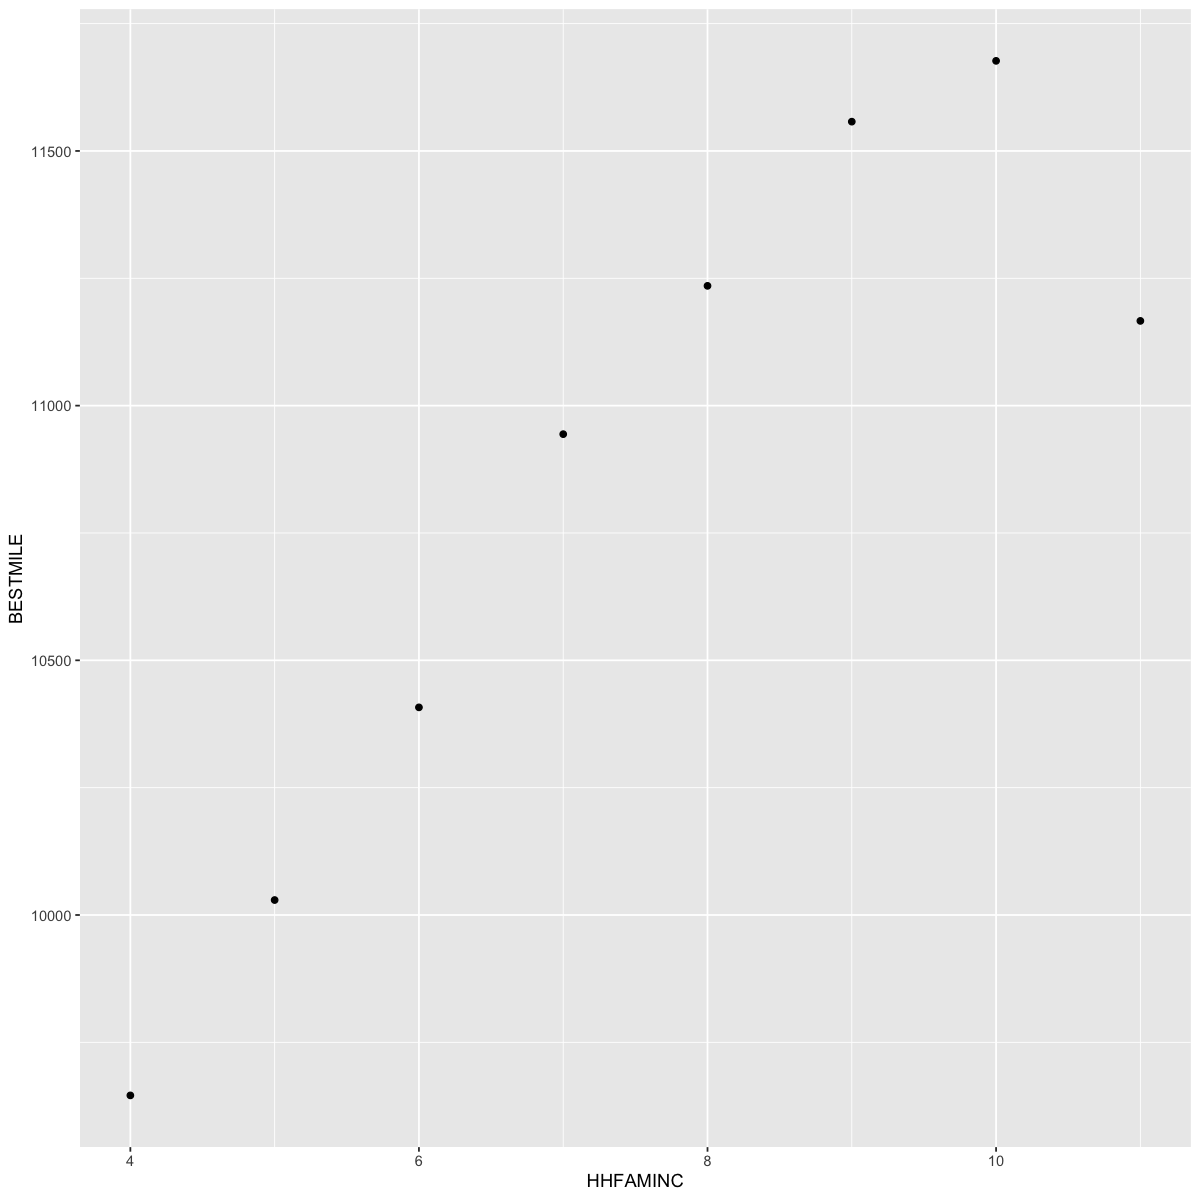

In [12]:
incmile = incmile[c('HHFAMINC','Bracket','BESTMILE')][4:14,]
ggplot(incmile, aes(HHFAMINC,BESTMILE)) + geom_point()

In [13]:
nhts.in$HHFAMINC = as.factor(nhts.in$HHFAMINC)
summary(lm(BESTMILE ~  HHFAMINC, nhts.in))


Call:
lm(formula = BESTMILE ~ HHFAMINC, data = nhts.in)

Residuals:
   Min     1Q Median     3Q    Max 
-11677  -6050  -1972   3238 190769 

Coefficients:
            Estimate Std. Error t value   Pr(>|t|)    
(Intercept)     7746       1738   4.457 0.00000831 ***
HHFAMINC-8      1147       1771   0.648     0.5172    
HHFAMINC-7      1751       1743   1.005     0.3151    
HHFAMINC1       1850       1744   1.061     0.2887    
HHFAMINC2       1555       1742   0.892     0.3723    
HHFAMINC3       1485       1740   0.854     0.3933    
HHFAMINC4       1900       1740   1.092     0.2747    
HHFAMINC5       2284       1739   1.313     0.1891    
HHFAMINC6       2662       1739   1.531     0.1257    
HHFAMINC7       3198       1739   1.839     0.0659 .  
HHFAMINC8       3490       1739   2.007     0.0448 *  
HHFAMINC9       3812       1740   2.191     0.0285 *  
HHFAMINC10      3931       1740   2.260     0.0238 *  
HHFAMINC11      3421       1740   1.966     0.0493 *  
---
Signif. codes: 

# Gas Tax Analysis

## Gas Forecast

### Setup

In [14]:
gas = read_excel('data/WorkingData.xlsx', sheet = 'GasRevMonthly')
gas = dummy_cols(gas, select_columns = c('month','year'))
gas$time = gas$year+gas$mnth/12
gas$year = factor(gas$year)
gas$mnth = factor(gas$mnth)


In [15]:
share.ann = read_excel('data/WorkingData.xlsx', sheet = 'share.ann')
share.m = lm(share ~ I(year^2) + year, share.ann)
reg.m = lm(registered ~ I(year^2) + year, share.ann)
ev.m = lm(ev ~ I(year^2) + year, share.ann)

In [16]:
share.mnth = read_excel('data/WorkingData.xlsx', sheet = 'share.mnth')
share.mnth$share.hat = share.m$coefficients[[1]] + share.m$coefficients[[2]]*(share.mnth$time^2) + 
    share.m$coefficients[[3]]*share.mnth$time
share.mnth$reg.hat = reg.m$coefficients[[1]] + reg.m$coefficients[[2]]*(share.mnth$time^2) + 
    reg.m$coefficients[[3]]*share.mnth$time
share.mnth$ev.hat = ev.m$coefficients[[1]] + ev.m$coefficients[[2]]*(share.mnth$time^2) + 
    ev.m$coefficients[[3]]*share.mnth$time
# write_xlsx(share.mnth,'data/sharemnth.xlsx')

### Forecast

In [17]:
names(gas)

[1] "year"            "month"           "mnth"            "key"            
 [5] "avg.vmt.share"   "gas.rev.ann"     "gas.base.ann"    "gas.tax"        
 [9] "gas.base.mnth"   "gas.rev.mnth"    "vmt.ann (mill)"  "vmt.mnth"       
[13] "avg.mpg"         "ev.count"        "month_April"     "month_August"   
[17] "month_December"  "month_February"  "month_January"   "month_July"     
[21] "month_June"      "month_March"     "month_May"       "month_November" 
[25] "month_October"   "month_September" "year_1999"       "year_2000"      
[29] "year_2001"       "year_2002"       "year_2003"       "year_2004"      
[33] "year_2005"       "year_2006"       "year_2007"       "year_2008"      
[37] "year_2009"       "year_2010"       "year_2011"       "year_2012"      
[41] "year_2013"       "year_2014"       "year_2015"       "year_2016"      
[45] "year_2017"       "year_2018"       "year_2019"       "year_2020"      
[49] "year_2021"       "year_2022"       "time"

#### Revenue

In [18]:
gas.m = lm(gas.rev.mnth ~ time + mnth + year, gas)
summary(gas.m)


Call:
lm(formula = gas.rev.mnth ~ time + mnth + year, data = gas)

Residuals:
     Min       1Q   Median       3Q      Max 
-9263212  -493118   -64545   506825  3723924 

Coefficients: (1 not defined because of singularities)
               Estimate  Std. Error t value             Pr(>|t|)    
(Intercept) -3843135483    48453750 -79.316 < 0.0000000000000002 ***
time            1938964       24100  80.456 < 0.0000000000000002 ***
mnth1          -2552733      391948  -6.513   0.0000000003946020 ***
mnth2           4165302      391963  10.627 < 0.0000000000000002 ***
mnth3           3217038      391989   8.207   0.0000000000000116 ***
mnth4           5866775      392025  14.965 < 0.0000000000000002 ***
mnth5           6040829      392071  15.407 < 0.0000000000000002 ***
mnth6           7197290      392128  18.354 < 0.0000000000000002 ***
mnth7           6683633      392195  17.042 < 0.0000000000000002 ***
mnth8           2494426      392272   6.359   0.0000000009431280 ***
mnth9         

In [19]:
# create dataframe
gas.fc = data.frame(year = c(rep(2023:2042,12)))
gas.fc = data.frame(year = c(gas.fc[order(gas.fc$year),]))
gas.fc$mnth = c(0:11)
gas.fc$time = gas.fc$year+(gas.fc$mnth/12)
gas.fc$vmt = NA
gas.fc$rate = NA
gas.fc$rev = NA
gas.fc = dummy_cols(gas.fc, select_columns = c('mnth'))

In [20]:
gas.fc$gas.rev = gas.m$coefficients[[1]] + gas.m$coefficients[[2]]*gas.fc$time + gas.m$coefficients[[3]]*gas.fc$mnth_1 +
    gas.m$coefficients[[4]]*gas.fc$mnth_2 + gas.m$coefficients[[5]]*gas.fc$mnth_3 + gas.m$coefficients[[6]]*gas.fc$mnth_4 + 
    gas.m$coefficients[[7]]*gas.fc$mnth_5 + gas.m$coefficients[[8]]*gas.fc$mnth_6 + gas.m$coefficients[[9]]*gas.fc$mnth_7 + 
    gas.m$coefficients[[10]]*gas.fc$mnth_8 + gas.m$coefficients[[11]]*gas.fc$mnth_9 + gas.m$coefficients[[12]]*gas.fc$mnth_10 + 
    gas.m$coefficients[[13]]*gas.fc$mnth_11 + gas.m$coefficients[[35]]

In [21]:
gas.fc = aggregate(gas.rev ~ year,gas.fc,sum)

#### Scoring

##### Constant Rate

In [22]:
base.m = lm(gas.base.mnth ~ time + mnth + year, gas)

base.fc = data.frame(year = c(rep(2023:2042,12)))
base.fc = data.frame(year = c(base.fc[order(base.fc$year),]))
base.fc$mnth = c(0:11)
base.fc$time = base.fc$year+(base.fc$mnth/12)
base.fc$rate = NA
base.fc$rev = NA
base.fc = dummy_cols(base.fc, select_columns = 'mnth')

In [23]:
base.fc$gas.base = base.m$coefficients[[1]] + base.m$coefficients[[2]]*base.fc$time + base.m$coefficients[[3]]*base.fc$mnth_1 +
    base.m$coefficients[[4]]*base.fc$mnth_2 + base.m$coefficients[[5]]*base.fc$mnth_3 + base.m$coefficients[[6]]*base.fc$mnth_4 + 
    base.m$coefficients[[7]]*base.fc$mnth_5 + base.m$coefficients[[8]]*base.fc$mnth_6 + base.m$coefficients[[9]]*base.fc$mnth_7 + 
    base.m$coefficients[[10]]*base.fc$mnth_8 + base.m$coefficients[[11]]*base.fc$mnth_9 + base.m$coefficients[[12]]*base.fc$mnth_10 + 
    base.m$coefficients[[13]]*base.fc$mnth_11 + base.m$coefficients[[35]]

In [24]:
constg.fc = aggregate(gas.base ~ year, base.fc, sum)
constg.fc$rate = 0.33
constg.fc$rev = constg.fc$rate*constg.fc$gas.base
constg.fc

year,gas.base,rate,rev
<int>,<dbl>,<dbl>,<dbl>
2023,2865032795,0.33,945460822
2024,2864959096,0.33,945436502
2025,2864885397,0.33,945412181
2026,2864811698,0.33,945387860
2027,2864737999,0.33,945363540
2028,2864664299,0.33,945339219
2029,2864590600,0.33,945314898
2030,2864516901,0.33,945290577
2031,2864443202,0.33,945266257


#### Scoring (+$0.01 per year)

#### Static

In [25]:
staticg.fc = aggregate(gas.base ~ year, base.fc, sum)
staticg.fc$rate = 0.33
for (r in 2:length(staticg.fc$gas.base))
    staticg.fc$rate[r] = staticg.fc$rate[r-1]+0.01
staticg.fc$rev.static = staticg.fc$rate*staticg.fc$gas.base
staticg.fc

year,gas.base,rate,rev.static
<int>,<dbl>,<dbl>,<dbl>
2023,2865032795,0.33,945460822
2024,2864959096,0.34,974086093
2025,2864885397,0.35,1002709889
2026,2864811698,0.36,1031332211
2027,2864737999,0.37,1059953060
2028,2864664299,0.38,1088572434
2029,2864590600,0.39,1117190334
2030,2864516901,0.40,1145806760
2031,2864443202,0.41,1174421713


##### Microdynamic

In [26]:
microg.fc = aggregate(gas.base ~ year, base.fc, sum)
microg.fc$rate = 0.33
microg.fc$elas = -0.03
for (r in 2:length(microg.fc$gas.base))
    microg.fc$rate[r] = microg.fc$rate[r-1]+0.01
microg.fc$taxperchange = (0.34-0.33)/0.33
for (r in 2:length(microg.fc$gas.base))
    microg.fc$taxperchange[r] = (microg.fc$rate[r]-microg.fc$rate[r-1])/microg.fc$rate[r-1]
microg.fc$baseperchange = microg.fc$elas*microg.fc$taxperchange
microg.fc$basechange = microg.fc$baseperchange*microg.fc$gas.base
microg.fc$base.micro = microg.fc$gas.base+microg.fc$basechange
microg.fc$rev.micro = microg.fc$base.micro*microg.fc$rate
microg.fc

year,gas.base,rate,elas,taxperchange,baseperchange,basechange,base.micro,rev.micro
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023,2865032795,0.33,-0.03,0.03030303,-0.0009090909,-2604575,2862428220,944601313
2024,2864959096,0.34,-0.03,0.03030303,-0.0009090909,-2604508,2862354588,973200560
2025,2864885397,0.35,-0.03,0.02941176,-0.0008823529,-2527840,2862357557,1001825145
2026,2864811698,0.36,-0.03,0.02857143,-0.0008571429,-2455553,2862356145,1030448212
2027,2864737999,0.37,-0.03,0.02777778,-0.0008333333,-2387282,2862350717,1059069765
2028,2864664299,0.38,-0.03,0.02702703,-0.0008108108,-2322701,2862341599,1087689808
2029,2864590600,0.39,-0.03,0.02631579,-0.0007894737,-2261519,2862329081,1116308342
2030,2864516901,0.40,-0.03,0.02564103,-0.0007692308,-2203475,2862313427,1144925371
2031,2864443202,0.41,-0.03,0.02500000,-0.0007500000,-2148332,2862294870,1173540897


##### Comparison

In [27]:
scoreg.fc = data.frame(year = c(rep(2023:2042,12)))
scoreg.fc = data.frame(year = c(scoreg.fc[order(scoreg.fc$year),]))
scoreg.fc$base.static = 1
scoreg.fc = aggregate(base.static ~ year, scoreg.fc,sum)
scoreg.fc$base.static = staticg.fc$gas.base
scoreg.fc$rate = staticg.fc$rate
scoreg.fc$rev.static = staticg.fc$rev.static
scoreg.fc$base.micro = microg.fc$base.micro
scoreg.fc$rev.micro = microg.fc$rev.micro
scoreg.fc$difference = scoreg.fc$rev.static-scoreg.fc$rev.micro
scoreg.fc

year,base.static,rate,rev.static,base.micro,rev.micro,difference
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2023,2865032795,0.33,945460822,2862428220,944601313,859509.8
2024,2864959096,0.34,974086093,2862354588,973200560,885532.8
2025,2864885397,0.35,1002709889,2862357557,1001825145,884744.0
2026,2864811698,0.36,1031332211,2862356145,1030448212,883999.0
2027,2864737999,0.37,1059953060,2862350717,1059069765,883294.2
2028,2864664299,0.38,1088572434,2862341599,1087689808,882626.3
2029,2864590600,0.39,1117190334,2862329081,1116308342,881992.4
2030,2864516901,0.40,1145806760,2862313427,1144925371,881389.8
2031,2864443202,0.41,1174421713,2862294870,1173540897,880816.3


## Relationship Analysis

In [28]:
names(gas)

[1] "year"            "month"           "mnth"            "key"            
 [5] "avg.vmt.share"   "gas.rev.ann"     "gas.base.ann"    "gas.tax"        
 [9] "gas.base.mnth"   "gas.rev.mnth"    "vmt.ann (mill)"  "vmt.mnth"       
[13] "avg.mpg"         "ev.count"        "month_April"     "month_August"   
[17] "month_December"  "month_February"  "month_January"   "month_July"     
[21] "month_June"      "month_March"     "month_May"       "month_November" 
[25] "month_October"   "month_September" "year_1999"       "year_2000"      
[29] "year_2001"       "year_2002"       "year_2003"       "year_2004"      
[33] "year_2005"       "year_2006"       "year_2007"       "year_2008"      
[37] "year_2009"       "year_2010"       "year_2011"       "year_2012"      
[41] "year_2013"       "year_2014"       "year_2015"       "year_2016"      
[45] "year_2017"       "year_2018"       "year_2019"       "year_2020"      
[49] "year_2021"       "year_2022"       "time"

In [29]:
rel.m = lm(gas.rev.mnth ~  gas.base.mnth + log(gas.tax) + ev.count + mnth + time + year, gas)
summary(rel.m)


Call:
lm(formula = gas.rev.mnth ~ gas.base.mnth + log(gas.tax) + ev.count + 
    mnth + time + year, data = gas)

Residuals:
     Min       1Q   Median       3Q      Max 
-3866706  -282574    -1106   279441  2689350 

Coefficients: (3 not defined because of singularities)
                        Estimate         Std. Error t value
(Intercept)   -34583991599.74192  14457939963.07252  -2.392
gas.base.mnth            0.22398            0.01357  16.506
log(gas.tax)    -434370201.93069    201061033.55980  -2.160
ev.count               -92.35053          288.55826  -0.320
mnth1             -1296294.21873       690159.85802  -1.878
mnth2             -3626300.27884      1186171.63711  -3.057
mnth3             -5258190.97196      1748656.44277  -3.007
mnth4             -6741127.80491      2317862.68122  -2.908
mnth5             -8025036.27868      2891859.46422  -2.775
mnth6             -9532221.41887      3465856.06279  -2.750
mnth7            -11010333.13785      4045818.86582  -2.721
mnth8 

## Adequacy Assessment 

### Historical Data (2022 USD)

In [30]:
adeq <- read_excel('data/WorkingData.xlsx', sheet = "GasRev")

#### Buoyancy

In [31]:
buoy.gas <- lm(log(gas.rev.real) ~ log(tpi.real), adeq)
summary(buoy.gas)

# Buoyancy = 0.4631


Call:
lm(formula = log(gas.rev.real) ~ log(tpi.real), data = adeq)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21902 -0.12223  0.04285  0.11055  0.19839 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)     8.2313     6.7323   1.223   0.2344  
log(tpi.real)   0.4631     0.2536   1.826   0.0815 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1406 on 22 degrees of freedom
Multiple R-squared:  0.1316,	Adjusted R-squared:  0.09212 
F-statistic: 3.334 on 1 and 22 DF,  p-value: 0.08148


#### Elasticity

In [32]:
elas.gas <- lm(log(base) ~ log(tpi.real) + c1 + c2 + c2 + c3 + c4 + c5 + c6,adeq)
summary(elas.gas)

# Elasticity = -0.07843


Call:
lm(formula = log(base) ~ log(tpi.real) + c1 + c2 + c2 + c3 + 
    c4 + c5 + c6, data = adeq)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06513 -0.01927  0.00000  0.02351  0.05355 

Coefficients:
              Estimate Std. Error t value  Pr(>|t|)    
(Intercept)   23.93921    3.95273   6.056 0.0000167 ***
log(tpi.real) -0.07843    0.14964  -0.524     0.607    
c1            -0.02068    0.02635  -0.785     0.444    
c2            -0.02621    0.04499  -0.583     0.568    
c3             0.02925    0.05436   0.538     0.598    
c4            -0.06706    0.05497  -1.220     0.240    
c5             0.02185    0.05449   0.401     0.694    
c6             0.03368    0.05470   0.616     0.547    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.03835 on 16 degrees of freedom
Multiple R-squared:  0.4053,	Adjusted R-squared:  0.1451 
F-statistic: 1.558 on 7 and 16 DF,  p-value: 0.2184


#### Stability

In [33]:
stab <- data.frame(SD = c(sd(adeq$d.gas.real),sd(adeq$d.tpi.real),sd(adeq$d.base)),
                   Max = c(max(adeq$d.gas.real),sd(adeq$d.tpi.real),sd(adeq$d.base)),
                   Min = c(min(adeq$d.gas.real),sd(adeq$d.tpi.real),sd(adeq$d.base)),
                   row.names = c('Change in Revenue','Change in Economic Activity',
                                 'Change in Base'))
stab*100

,SD,Max,Min
,<dbl>,<dbl>,<dbl>
Change in Revenue,10.744618,48.708014,-6.595596
Change in Economic Activity,2.205255,2.205255,2.205255
Change in Base,4.500163,4.500163,4.500163


### Forecasted Data

#### Setup

In [35]:
#write excel file to add % change and tax change dummys
adeq.fc = data.frame(year = scoreg.fc$year,
    gas.rev = scoreg.fc$rev.micro)
adeq.fc = aggregate(gas.rev ~ year, adeq.fc, sum)
adeq.fc$tpi = tpi.fc.ann$tpi
adeq.fc$base = c(aggregate(base.micro ~ year, scoreg.fc, sum)[2])[[1]]
adeq.fc$rate = scoreg.fc$rate
write_xlsx(share.mnth,'data/adeq.xlsx',)

#### Buoyancy

In [ ]:
buoy.gas.fc <- lm(log(gas.rev) ~ log(tpi), adeq.fc)
summary(buoy.gas.fc)

# Buoyancy = 2.01027


Call:
lm(formula = log(gas.rev) ~ log(tpi), data = adeq.fc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.009002 -0.003103  0.001173  0.003745  0.004768 

Coefficients:
             Estimate Std. Error t value            Pr(>|t|)    
(Intercept) -33.01030    0.39449  -83.68 <0.0000000000000002 ***
log(tpi)      2.01027    0.01471  136.68 <0.0000000000000002 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.004494 on 18 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.999 
F-statistic: 1.868e+04 on 1 and 18 DF,  p-value: < 0.00000000000000022


#### Elasticity

In [ ]:
elas.gas.fc <- lm(log(base) ~ log(tpi),adeq.fc)
summary(elas.gas.fc)


Call:
lm(formula = log(base) ~ log(tpi), data = adeq.fc)

Residuals:
         Min           1Q       Median           3Q          Max 
-0.000024602 -0.000008417  0.000002497  0.000011405  0.000014677 

Coefficients:
               Estimate  Std. Error  t value             Pr(>|t|)    
(Intercept) 21.79301066  0.00115801 18819.35 < 0.0000000000000002 ***
log(tpi)    -0.00067651  0.00004317   -15.67     0.00000000000619 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.00001319 on 18 degrees of freedom
Multiple R-squared:  0.9317,	Adjusted R-squared:  0.9279 
F-statistic: 245.5 on 1 and 18 DF,  p-value: 0.000000000006193


#### Stability

### Suits Index

In [ ]:
g.suits = nhts[c('HHFAMINC','HHSTATE', 'GSTOTCST')][nhts$HHSTATE == 'IN',]
g.suits = aggregate(GSTOTCST ~ HHFAMINC,g.suits,sum)[4:14,]
g.suits$Bracket = c('Less than $10,000','$10,000-$14,999','$15,000-$24,999','$25,000-$34,999','$35,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$124,999','$125,000-$149,999','$150,000-$199,999','$200,000 or more')

In [ ]:
g.suits$rate = 0.33
g.suits$burden = g.suits$GSTOTCST * g.suits$rate
g.suits$rawinc = c(10000,4999,9999,9999,14999,24999,24999,24999,24999,49999,49999)
g.suits$shareinc = g.suits$rawinc/sum(g.suits$rawinc)
g.suits$cuminc = g.suits$rawinc[1]/sum(g.suits$rawinc)
g.suits$sharebur = g.suits$burden/sum(g.suits$burden)
g.suits$cumbur = g.suits$burden[1]/sum(g.suits$burden)



In [ ]:
for (row in 2:length(g.suits$HHFAMINC)) {
    g.suits$cuminc[row] = g.suits$shareinc[row] + g.suits$cuminc[row-1]
    g.suits$cumbur[row] = g.suits$sharebur[row] + g.suits$cumbur[row-1]
}


In [ ]:
g.suits = g.suits[c(1:6,8,10)]

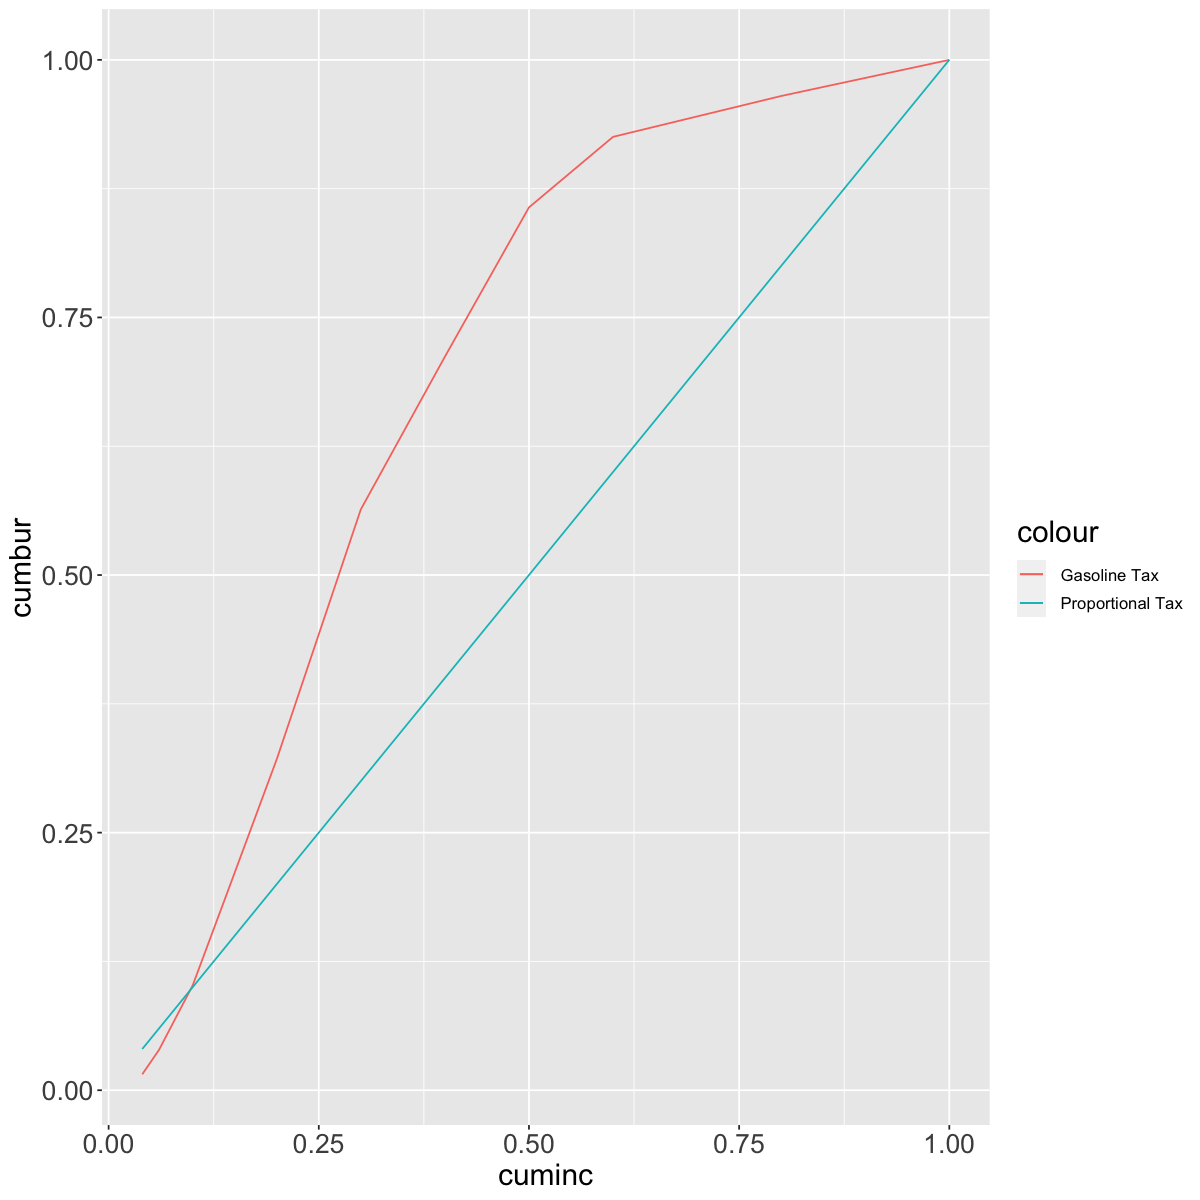

In [ ]:
# x = cumulative income share, y = cumulative tax burden
ggplot(g.suits) + 
    geom_line(aes(cuminc,cumbur, color='Gasoline Tax')) + 
    geom_line(aes(cuminc,cuminc, color='Proportional Tax')) + theme
    

In [ ]:
g.suits$k = (5000/length(g.suits$cumbur))/5000
g.suits$l = (1/2)*(g.suits$cumbur[1])*
    (g.suits$cuminc[1])
for (row in 2:length(g.suits$cumbur)){
    g.suits$l[row] = (1/2)*(g.suits$cumbur[row]+g.suits$cumbur[row-1])*
    (g.suits$cuminc[row]+g.suits$cuminc[row-1])
}

In [ ]:
# Gas Tax Suits
(sum(g.suits$k)-sum(g.suits$l))/sum(g.suits$k)

[1] -4.581222

# VMT Tax Analysis

## VMT Forecast (10 Year)

### Setup

In [ ]:
vmt = read_excel('data/WorkingData.xlsx', sheet= 'VmtMonthly')
vmt = dummy_cols(vmt, select_columns = c('mnth','year'))
vmt$time = vmt$year+(vmt$mnth/12)
vmt$year = factor(vmt$year)
vmt$mnth = factor(vmt$mnth)


vmt.fc = data.frame(year = c(rep(2023:2032,12)))
vmt.fc = data.frame(year = c(vmt.fc[order(vmt.fc$year),]))
vmt.fc$mnth = c(1:12)
vmt.fc$time = vmt.fc$year+(vmt.fc$mnth/12)
vmt.fc$vmt = NA
vmt.fc$rate = NA
vmt.fc$rev = NA
vmt.fc$gas.rev = NA
vmt.fc = dummy_cols(vmt.fc, select_columns = c('mnth'))

### Forecast

In [ ]:
names(vmt)

[1] "year"      "month"     "mnth"      "key"       "vmt.mnth"  "mnth_0"   
 [7] "mnth_1"    "mnth_2"    "mnth_3"    "mnth_4"    "mnth_5"    "mnth_6"   
[13] "mnth_7"    "mnth_8"    "mnth_9"    "mnth_10"   "mnth_11"   "year_1999"
[19] "year_2000" "year_2001" "year_2002" "year_2003" "year_2004" "year_2005"
[25] "year_2006" "year_2007" "year_2008" "year_2009" "year_2010" "year_2011"
[31] "year_2012" "year_2013" "year_2014" "year_2015" "year_2016" "year_2017"
[37] "year_2018" "year_2019" "year_2020" "year_2021" "year_2022" "time"

In [ ]:
vmt.m = lm(vmt.mnth ~ time + mnth + year, vmt)
data.frame(vmt.m$coefficients)

,vmt.m.coefficients
,<dbl>
(Intercept),-88279793315
time,46857634
mnth1,-291483160
mnth2,584799596
mnth3,511289998
mnth4,838745083
mnth5,862063603
mnth6,1019405029
mnth7,981631564


In [ ]:
vmt.fc$vmt = vmt.m$coefficients[[1]] + vmt.m$coefficients[[2]]*vmt.fc$time + vmt.m$coefficients[[3]]*vmt.fc$mnth_1 +
    vmt.m$coefficients[[4]]*vmt.fc$mnth_2 + vmt.m$coefficients[[5]]*vmt.fc$mnth_3 + vmt.m$coefficients[[6]]*vmt.fc$mnth_4 + 
    vmt.m$coefficients[[7]]*vmt.fc$mnth_5 + vmt.m$coefficients[[8]]*vmt.fc$mnth_6 + vmt.m$coefficients[[9]]*vmt.fc$mnth_7 + 
    vmt.m$coefficients[[10]]*vmt.fc$mnth_8 + vmt.m$coefficients[[11]]*vmt.fc$mnth_9 + vmt.m$coefficients[[12]]*vmt.fc$mnth_10 + 
    vmt.m$coefficients[[13]]*vmt.fc$mnth_11 + vmt.m$coefficients[[35]]

## VMT Tax Revenue Forecast

### Assumes all drivers switch to vmt tax on Jan 1, 2023 (no OOS)

In [ ]:
# Oregon Rate
vmt.fc$rate = 0.018
vmt.fc$rev = vmt.fc$vmt*vmt.fc$rate
vmt.fc.year = aggregate(rev ~ year, vmt.fc, sum)
vmt.fc.year

year,rev
<int>,<dbl>
2023,1534314615
2024,1544435864
2025,1554557113
2026,1564678362
2027,1574799611
2028,1584920860
2029,1595042109
2030,1605163358
2031,1615284607
